# 🧠 Projet 1 : Analyse des ventes d’un e-commerce



## 🎯 Objectif  
Identifier les **produits performants**, les **comportements clients** et les **périodes fortes/faibles**.



## 📁 Données utilisées  

- `date_commande`  
- `produit`, `catégorie`  
- `quantité`, `prix_unitaire`  
- `client_id`, `région`, `revenu`  
- `canal` (web, mobile, magasin)  

👉 *Un jeu de données simulé est utilisé pour illustrer l'analyse.*

---

## 📊 Visualisations à inclure

| Objectif                                 | Type de graphique              |
|------------------------------------------|-------------------------------|
| Répartition des ventes par catégorie     | Histogramme / Pie chart       |
| Évolution des ventes dans le temps       | Line chart                    |
| Corrélation prix vs. quantité            | Scatter plot                  |
| Valeurs extrêmes dans les montants       | Boxplot                       |
| Activité par heure et par jour           | Heatmap                       |

---

## 🧠 Compétences métiers mobilisées

- ✅ Calcul des **KPI** : chiffre d'affaires, panier moyen  
- 📈 Détection de **saisonnalités** : pics de vente par semaine/jour  
- 👥 **Segmentation clients** : par région, revenu ou canal d’achat  
- 🥇 Analyse des **produits performants** : top ventes par catégorie  





















## 🔍 Étapes de l’analyse



### 1. Chargement des données (simulées)  
> On génère 1000 commandes aléatoires avec des champs typiques d’un site e-commerce.

---

In [94]:
import pandas as pd
import numpy as np

# 📦 Paramètres
np.random.seed(42)
n_commandes = 5000
max_produits_par_commande = 5
dates = pd.date_range("2020-01-01", pd.Timestamp.today()).to_list()

# 🎯 Ajouter une saisonnalité + croissance réaliste
def biais_saisonnier(date):
    jour = date.weekday()
    mois = date.month
    facteur = 1.0
    if jour in [5, 6]:  # Samedi, dimanche
        facteur += 1.2
    if mois in [3, 5]:  # Mars et Mai : promos
        facteur += 1.5
    return facteur

def facteur_croissance(date, base_year=2020, taux_croissance_annuel=0.2):
    """Applique une croissance annuelle (exponentielle) à partir d'une année de base"""
    années_passées = date.year - base_year
    return (1 + taux_croissance_annuel) ** années_passées

# 📈 Poids combinant saisonnalité et croissance
poids_dates = np.array([
    biais_saisonnier(d) * facteur_croissance(d)
    for d in dates
])
poids_dates /= poids_dates.sum()

# 👥 Clients
client_ids = np.random.choice(range(1000, 1500), size=n_commandes, replace=True)
regions = ["Nord", "Sud", "Est", "Ouest"]
revenus_par_région = {
    "Nord": (2200, 400),
    "Sud": (2800, 600),
    "Est": (2000, 300),
    "Ouest": (2500, 500)
}

# 📦 Produits
produits_info = {
    "T-shirt": ("Homme", 10, 25),
    "Pantalon": ("Homme", 30, 60),
    "Chaussures": ("Femme", 50, 100),
    "Sac": ("Femme", 20, 50),
    "Veste": ("Enfant", 40, 90),
    "Robe": ("Femme", 35, 70),
    "Sweat": ("Homme", 25, 45),
    "Casquette": ("Enfant", 8, 20),
    "Baskets": ("Homme", 60, 110)
}
produits = list(produits_info.keys())

# 📑 Génération des commandes
lignes = []
commande_id = 1

for i in range(n_commandes):
    date = np.random.choice(dates, p=poids_dates)
    client = client_ids[i]
    region = np.random.choice(regions)
    canal = np.random.choice(["web", "mobile", "magasin"], p=[0.45, 0.35, 0.20])
    revenu = max(1000, np.random.normal(*revenus_par_région[region]))

    nb_produits = np.random.randint(1, max_produits_par_commande + 1)
    produits_disponibles = np.random.choice(produits, size=nb_produits, replace=False)

    heure = np.random.choice(
        list(range(8, 22)),
        p=np.linspace(1, 3, 14) / np.linspace(1, 3, 14).sum()  # Plus de commandes vers 18h-21h
    )

    for produit in produits_disponibles:
        categorie, prix_min, prix_max = produits_info[produit]
        prix = np.round(np.random.uniform(prix_min, prix_max), 2)
        quantite = np.random.randint(1, 4) if prix < 50 else 1
        montant = prix * quantite

        lignes.append({
            "commande_id": commande_id,
            "date_commande": date,
            "produit": produit,
            "categorie": categorie,
            "quantité": quantite,
            "prix_unitaire": prix,
            "montant_commande": montant,
            "client_id": client,
            "région": region,
            "revenu": np.round(revenu, 2),
            "canal": canal,
            "jour_semaine": date.strftime("%A"),
            "heure_commande": heure
        })

    commande_id += 1

# 📊 Création du DataFrame
df = pd.DataFrame(lignes)

# ✅ Vérification
print("Nombre total de lignes :", len(df))
print(df["date_commande"].dt.year.value_counts().sort_index())
df.head()


Nombre total de lignes : 14968
date_commande
2020    1694
2021    1955
2022    2637
2023    3184
2024    3748
2025    1750
Name: count, dtype: int64


,commande_id,date_commande,produit,categorie,quantité,prix_unitaire,montant_commande,client_id,région,revenu,canal,jour_semaine,heure_commande
0,1,2024-08-06,Pantalon,Homme,1,33.69,33.69,1102,Sud,3490.18,web,Tuesday,18
1,2,2024-04-16,T-shirt,Homme,1,13.52,13.52,1435,Ouest,2639.92,web,Tuesday,16
2,2,2024-04-16,Chaussures,Femme,1,90.20,90.20,1435,Ouest,2639.92,web,Tuesday,16
3,3,2023-07-01,Chaussures,Femme,1,87.43,87.43,1348,Est,2067.89,web,Saturday,9
4,3,2023-07-01,T-shirt,Homme,3,14.76,44.28,1348,Est,2067.89,web,Saturday,9



### 2. Visualisation 1 : Répartition des ventes par catégorie  
- 📊 **Histogramme horizontal** : total des ventes par catégorie  
- 🥧 **Camembert** : part de chaque catégorie dans le chiffre d'affaires global  


<ipython-input-95-431f5bb7171e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ca_par_categorie.values, y=ca_par_categorie.index, palette="Blues_d")


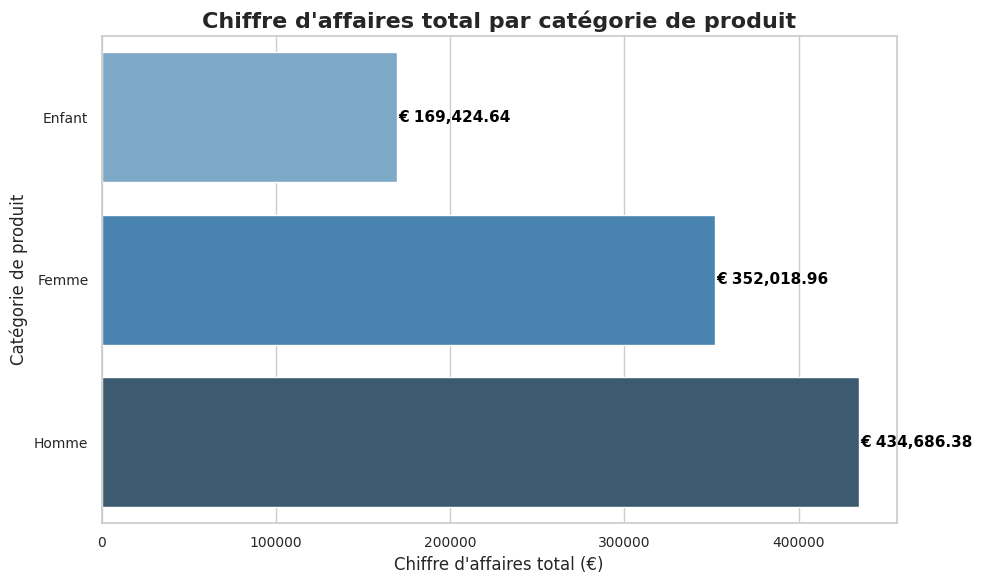

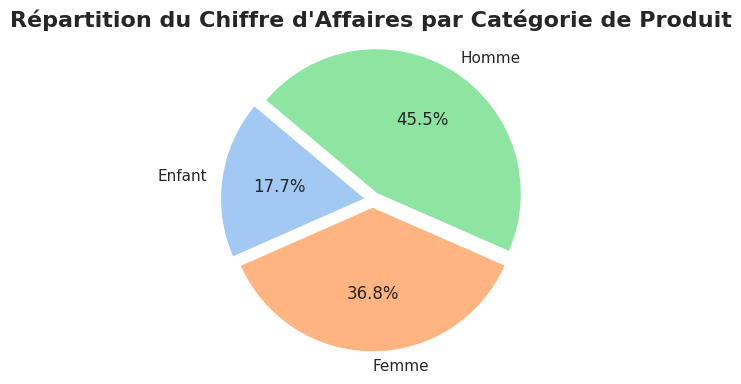

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

# 🔢 Agrégation du CA par catégorie
ca_par_categorie = df.groupby("categorie")["montant_commande"].sum().sort_values()

# 📊 1. Histogramme horizontal avec plus de détails
plt.figure(figsize=(10, 6))
sns.barplot(x=ca_par_categorie.values, y=ca_par_categorie.index, palette="Blues_d")
plt.title("Chiffre d'affaires total par catégorie de produit", fontsize=16, weight='bold')
plt.xlabel("Chiffre d'affaires total (€)", fontsize=12)
plt.ylabel("Catégorie de produit", fontsize=12)
plt.tick_params(axis='both', labelsize=10)

# Ajouter des valeurs sur les barres
for index, value in enumerate(ca_par_categorie.values):
    plt.text(value + 1000, index, f'€ {value:,.2f}', va='center', fontweight='bold', fontsize=11, color="black")

plt.tight_layout()
plt.show()

# 🥧 2. Camembert avec légendes et annotations
plt.figure(figsize=(4, 4))
plt.pie(ca_par_categorie.values,
        labels=ca_par_categorie.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"),
        explode=[0.05]*len(ca_par_categorie))

plt.title("Répartition du Chiffre d'Affaires par Catégorie de Produit", fontsize=16, weight='bold')
plt.axis("equal")  # cercle parfait
plt.tight_layout()
plt.show()



### 3. Visualisation 2 : Évolution du CA dans le temps  
- 📈 **Courbe temporelle** du chiffre d’affaires quotidien  
- 📌 Repérage des **tendances**, **pics** et **creux**  

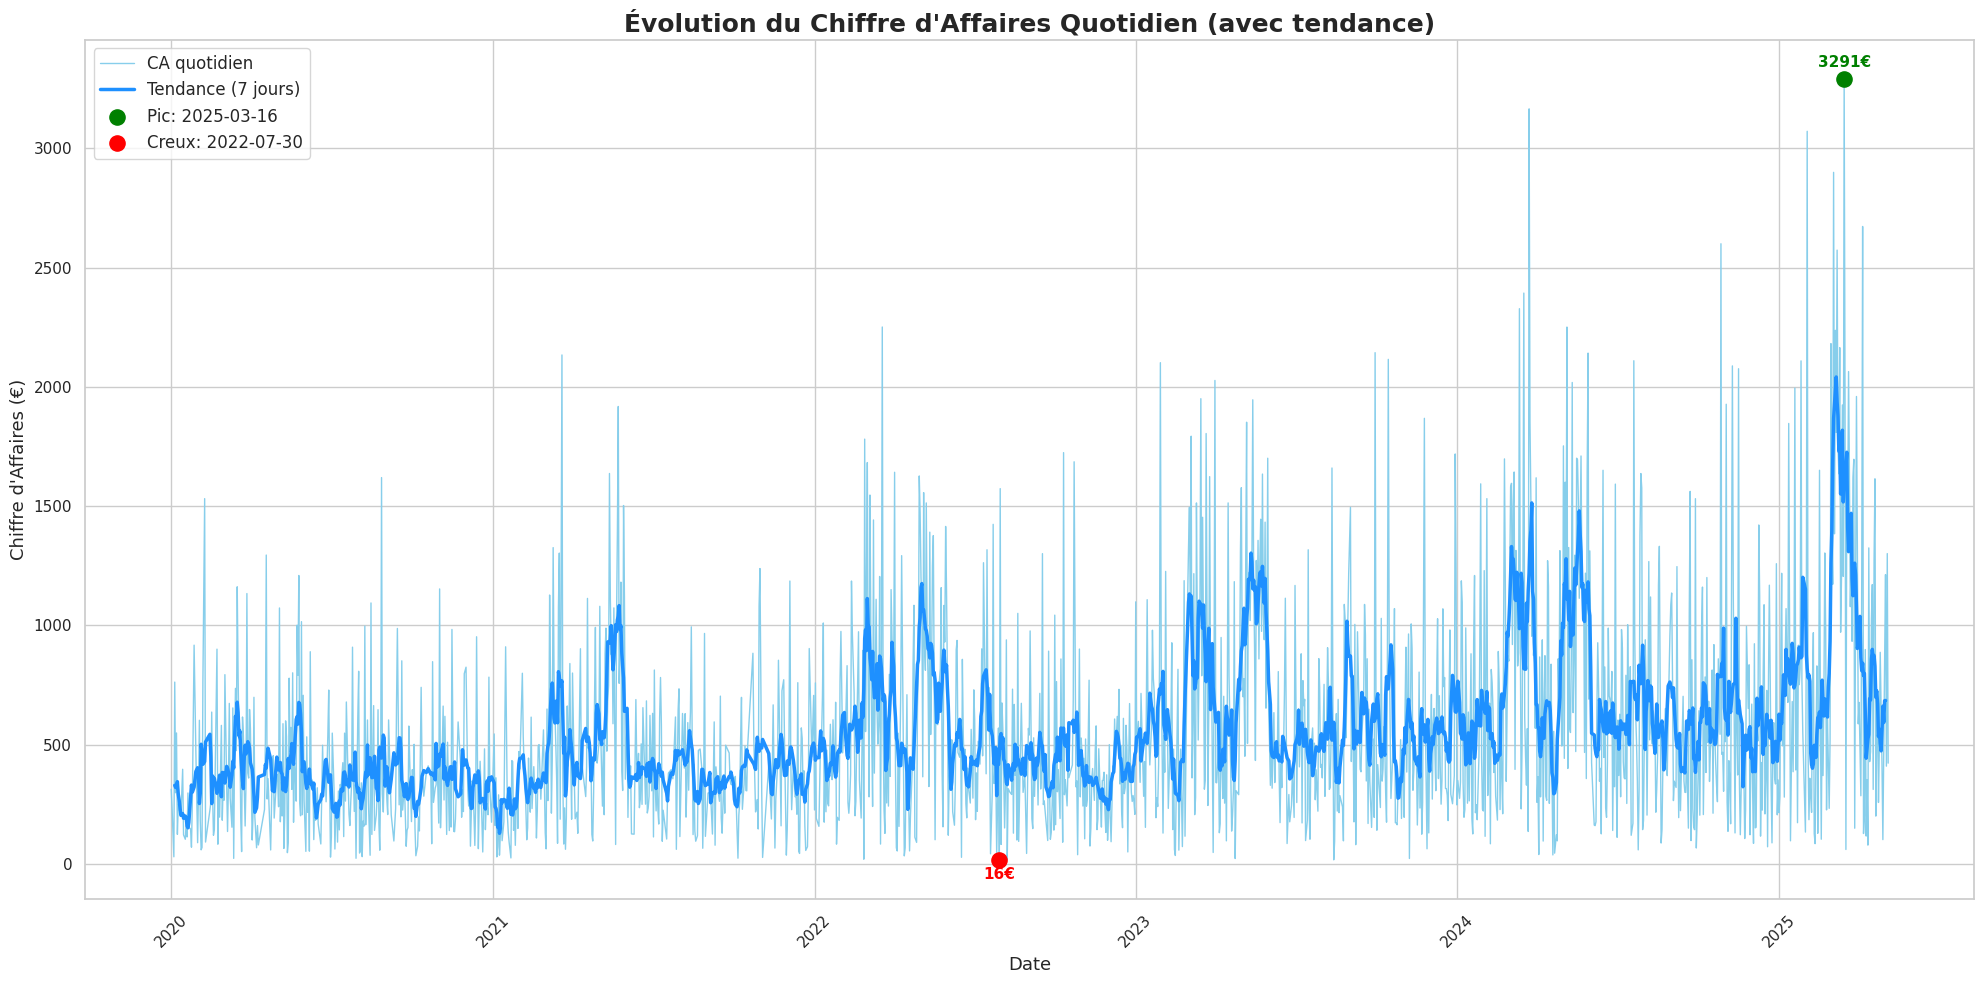

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔢 Agrégation du CA par jour
ca_par_jour = df.groupby("date_commande")["montant_commande"].sum().sort_index()

# 📉 Lissage avec une moyenne mobile (7 jours)
ca_smooth = ca_par_jour.rolling(window=7, center=True).mean()

# 🎨 Style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

# 📈 Courbe brute
sns.lineplot(x=ca_par_jour.index, y=ca_par_jour.values, color="skyblue", linewidth=1, label="CA quotidien")

# 📈 Courbe lissée
sns.lineplot(x=ca_smooth.index, y=ca_smooth.values, color="dodgerblue", linewidth=2.5, label="Tendance (7 jours)")

# 📌 Pic & creux
max_ca = ca_par_jour.idxmax()
min_ca = ca_par_jour.idxmin()
max_value = ca_par_jour.max()
min_value = ca_par_jour.min()

plt.scatter(max_ca, max_value, color='green', s=120, label=f"Pic: {max_ca.strftime('%Y-%m-%d')}", zorder=5)
plt.scatter(min_ca, min_value, color='red', s=120, label=f"Creux: {min_ca.strftime('%Y-%m-%d')}", zorder=5)

plt.text(max_ca, max_value + 50, f"{max_value:.0f}€", color="green", ha='center', fontsize=11, weight='bold')
plt.text(min_ca, min_value - 80, f"{min_value:.0f}€", color="red", ha='center', fontsize=11, weight='bold')

# 🎯 Titre et axes
plt.title("Évolution du Chiffre d'Affaires Quotidien (avec tendance)", fontsize=18, weight='bold')
plt.xlabel("Date", fontsize=13)
plt.ylabel("Chiffre d'Affaires (€)", fontsize=13)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



### 4. Visualisation 3 : Corrélation prix / quantité
- 🔍 Scatter plot pour observer si les produits moins chers sont achetés en plus grande quantité

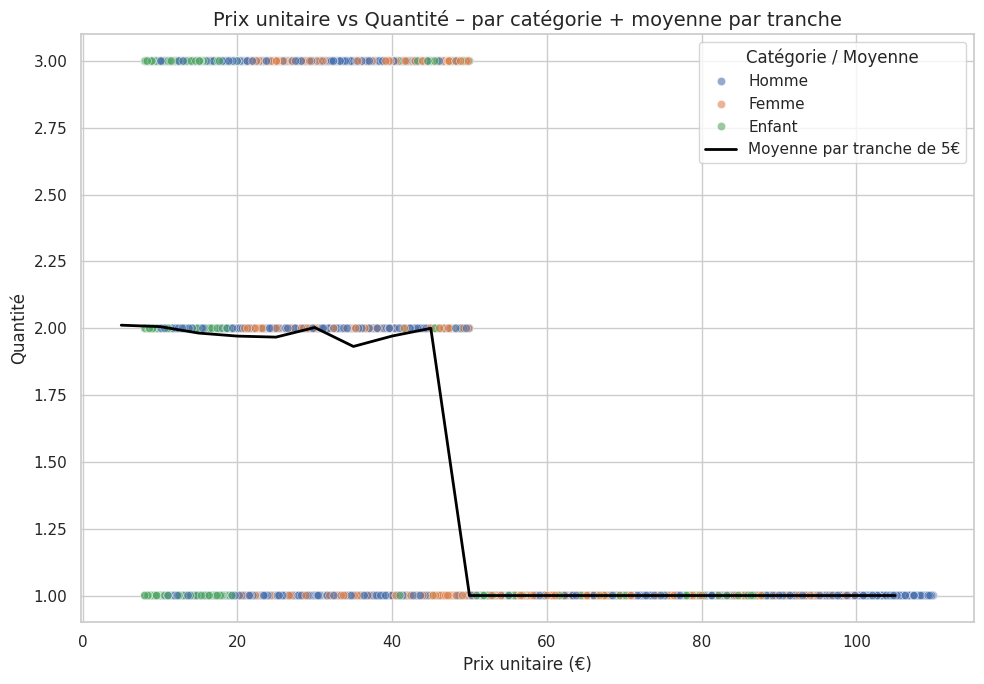

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🧮 Créer des tranches de prix de 5€
df['tranche_prix'] = (df['prix_unitaire'] // 5) * 5  # arrondi inférieur multiple de 5

# 🎯 Moyenne des quantités par tranche de prix
moyennes = df.groupby('tranche_prix')['quantité'].mean().reset_index()

# 📊 Tracer le scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='prix_unitaire', y='quantité', hue='categorie', alpha=0.6)

# ➕ Ajouter la courbe des moyennes
sns.lineplot(data=moyennes, x='tranche_prix', y='quantité', color='black', linewidth=2, label='Moyenne par tranche de 5€')

# 🖋️ Titres et axes
plt.title("Prix unitaire vs Quantité – par catégorie + moyenne par tranche", fontsize=14)
plt.xlabel("Prix unitaire (€)")
plt.ylabel("Quantité")
plt.legend(title='Catégorie / Moyenne')
plt.tight_layout()
plt.show()


### 5. Visualisation 4 : Valeurs extrêmes
- 📦 Boxplot par catégorie pour identifier des paniers anormalement élevés ou faibles

<ipython-input-105-9203e6a4a280>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data=df.groupby("commande_id").apply(
<ipython-input-105-9203e6a4a280>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


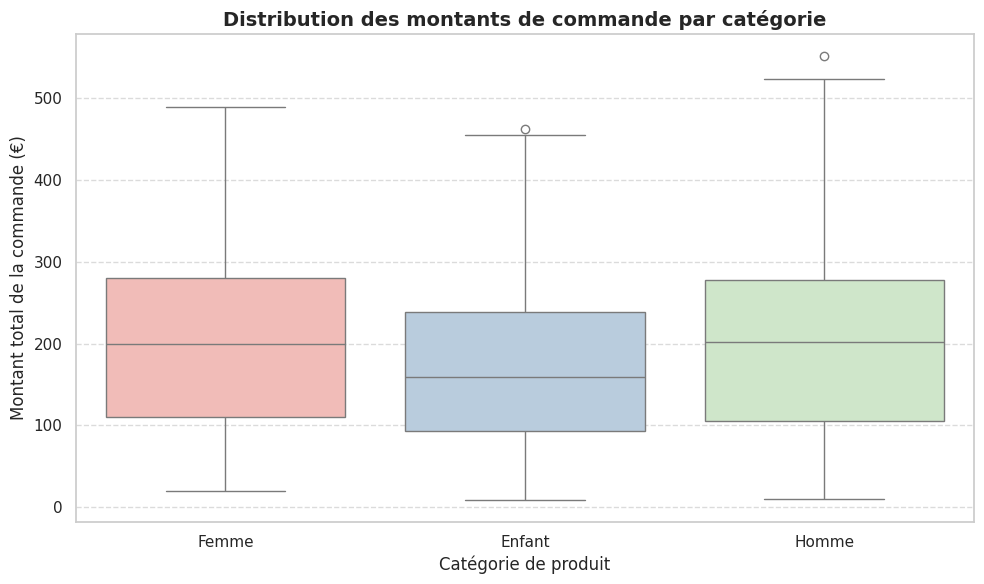

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df.groupby("commande_id").apply(
        lambda g: pd.Series({
            "montant_commande": g["quantité"].mul(g["prix_unitaire"]).sum(),
            "categorie": g["categorie"].mode()[0]
        })
    ).reset_index(),
    x='categorie',
    y='montant_commande',
    palette='Pastel1'
)

# 🎨 Mise en forme
plt.title("Distribution des montants de commande par catégorie", fontsize=14, weight='bold')
plt.xlabel("Catégorie de produit", fontsize=12)
plt.ylabel("Montant total de la commande (€)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




### 6. Visualisation 5 : Activité par jour et heure  
- 🔥 **Heatmap** croisant le jour de la semaine et l’heure de la commande  
- Permet de détecter les **pics horaires d'activité**


<ipython-input-100-3dd0c6215259>:20: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


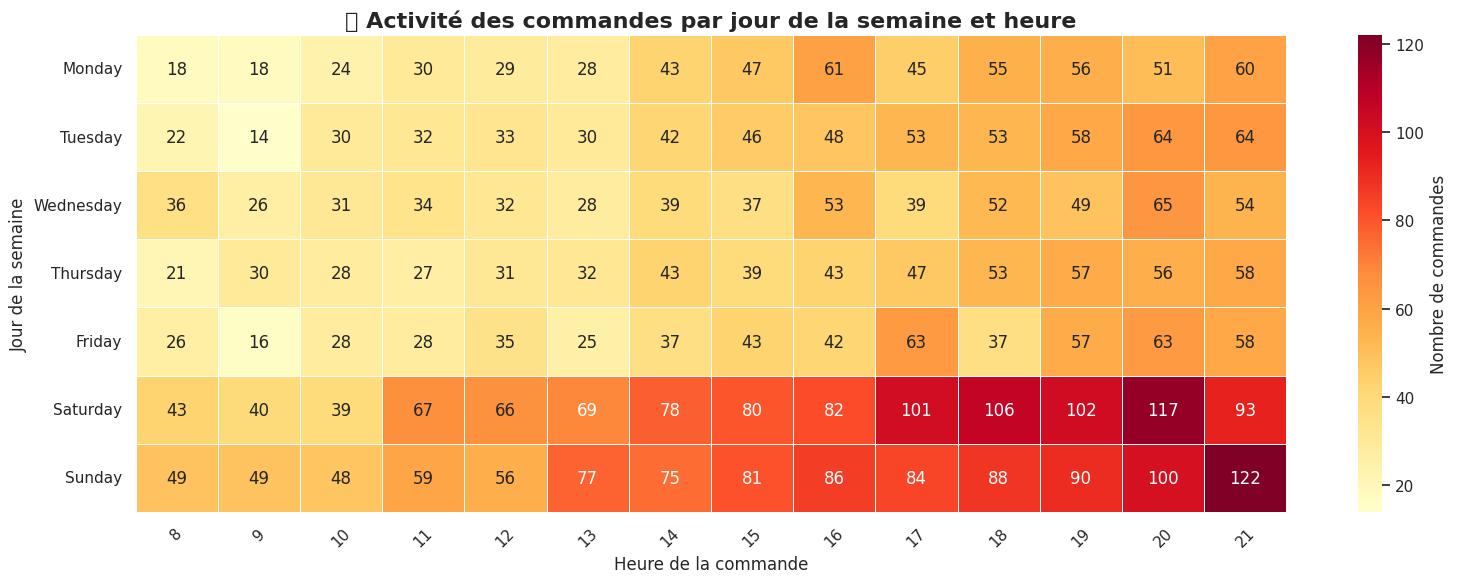

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🧮 Comptage du nombre de commandes par jour et heure
heatmap_data = df_commande.groupby(['jour_semaine', 'heure_commande']).size().reset_index(name='nb_commandes')

# 🔁 Réorganisation pour la heatmap
jours_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_data.pivot(index='jour_semaine', columns='heure_commande', values='nb_commandes').reindex(jours_order)

# 🔥 Affichage de la heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_pivot, cmap="YlOrRd", linewidths=0.5, annot=True, fmt=".0f", cbar_kws={'label': 'Nombre de commandes'})

plt.title("🔥 Activité des commandes par jour de la semaine et heure", fontsize=16, weight='bold')
plt.xlabel("Heure de la commande", fontsize=12)
plt.ylabel("Jour de la semaine", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 7. Indicateurs clés (KPI)
- 💰 Chiffre d’affaires total
- 📦 Nombre de commandes
- 🛒 Panier moyen

In [101]:
import pandas as pd

# Création d'une colonne "montant" pour chaque ligne
df['montant'] = df['quantité'] * df['prix_unitaire']

# 💰 Chiffre d'affaires total
chiffre_affaires_total = df['montant'].sum()

# 📦 Nombre de commandes (en supposant qu’une ligne = une commande)
nombre_commandes = df.shape[0]

# 🛒 Panier moyen
panier_moyen = chiffre_affaires_total / nombre_commandes

# 📋 Affichage des KPI
print("💰 Chiffre d'affaires total : {:.2f} €".format(chiffre_affaires_total))
print("📦 Nombre de commandes : {}".format(nombre_commandes))
print("🛒 Panier moyen : {:.2f} €".format(panier_moyen))


💰 Chiffre d'affaires total : 956129.98 €
📦 Nombre de commandes : 14968
🛒 Panier moyen : 63.88 €


### 8. Analyse de saisonnalité
- 📅 Ventes hebdomadaires pour détecter une logique de saison ou l’impact de campagnes promotionnelles

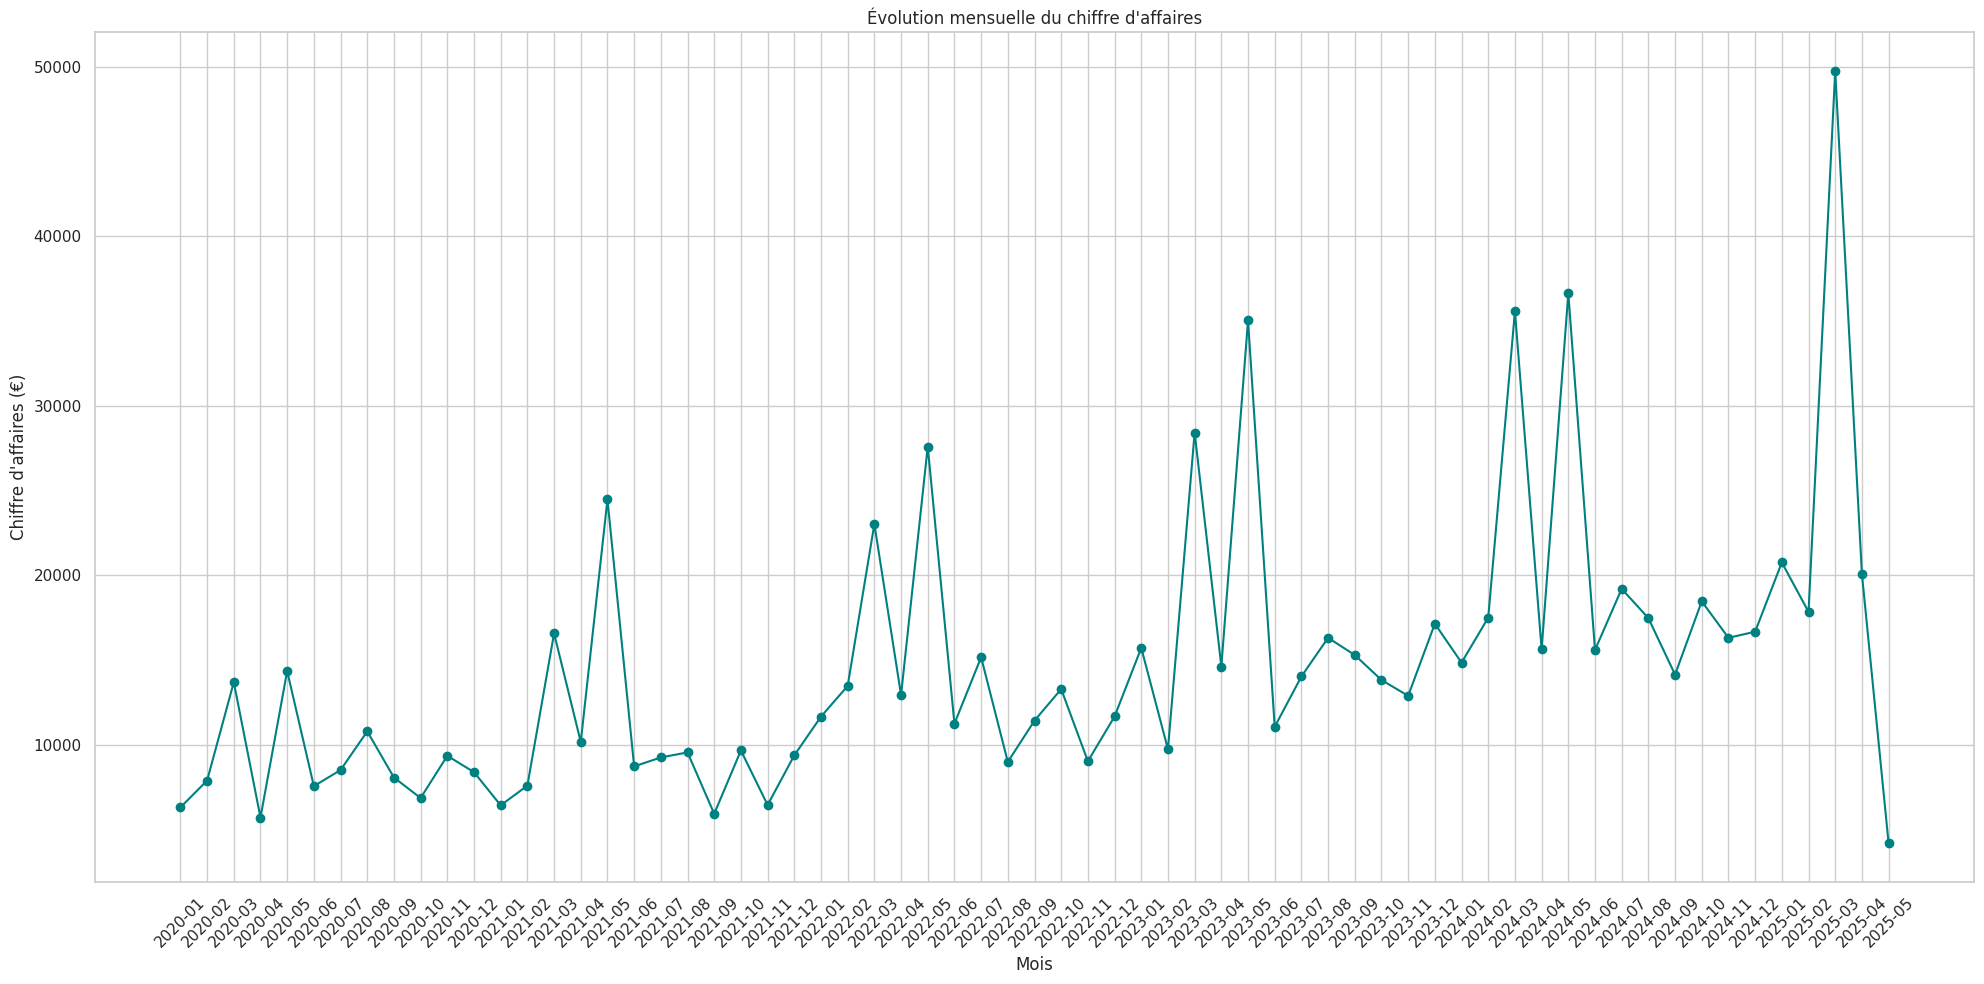

In [102]:
import matplotlib.pyplot as plt

# S'assurer que la colonne 'date_commande' est bien en datetime
df['date_commande'] = pd.to_datetime(df['date_commande'])

# Recalcul du montant si nécessaire
df['montant'] = df['quantité'] * df['prix_unitaire']

# Créer une colonne 'annee_mois' pour le regroupement
df['annee_mois'] = df['date_commande'].dt.to_period('M').astype(str)

# Calcul du CA mensuel
ca_mensuel = df.groupby('annee_mois')['montant'].sum().reset_index()

# 📈 Tracer le graphique
plt.figure(figsize=(20, 10))
plt.plot(ca_mensuel['annee_mois'], ca_mensuel['montant'], marker='o', color='teal')
plt.title("Évolution mensuelle du chiffre d'affaires")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
